<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"

#### Install the required libraries and import them


In [2]:
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


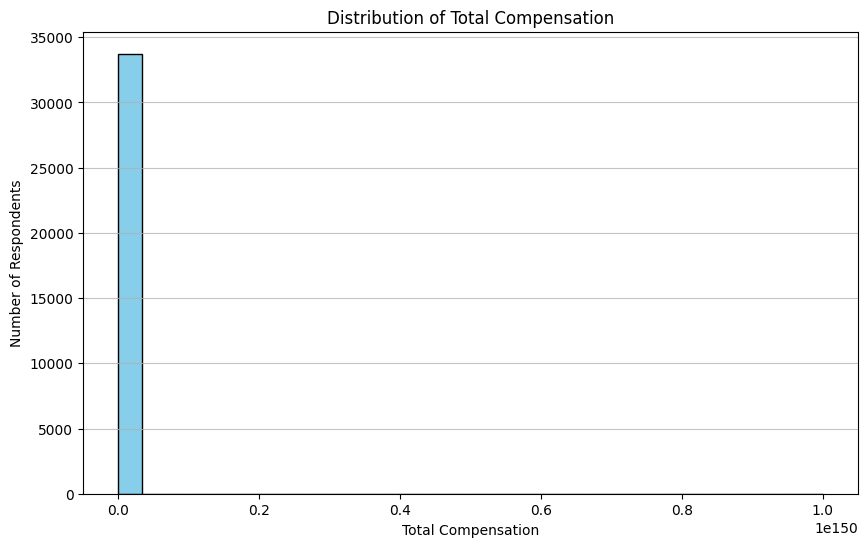

In [9]:
# Write your code here
QUERY = """
SELECT CompTotal
FROM main
"""
df_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df_comp['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


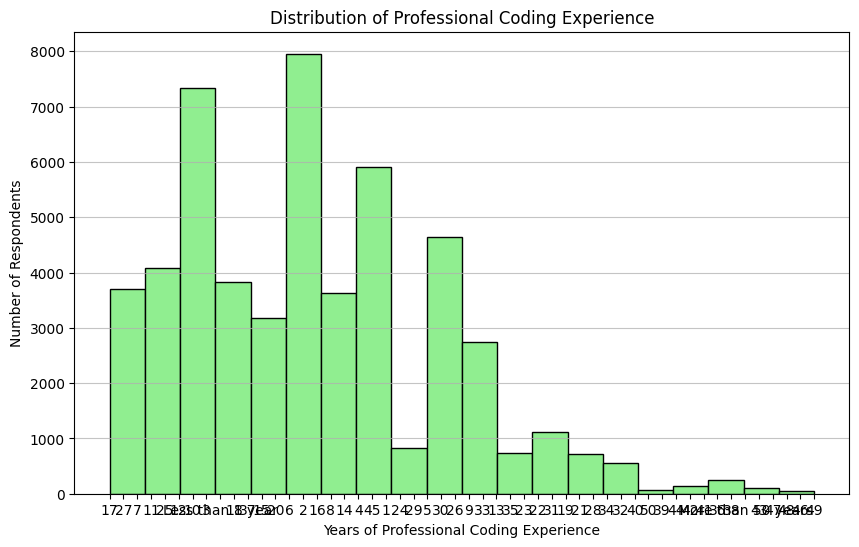

In [10]:
# Write your code here
QUERY = """
SELECT YearsCodePro
FROM main
"""
df_exp = pd.read_sql_query(QUERY, conn)

# --- FIX: Remove rows with missing values ---
df_exp.dropna(inplace=True)
# -------------------------------------------

plt.figure(figsize=(10, 6))
plt.hist(df_exp['YearsCodePro'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [12]:
import seaborn as sns


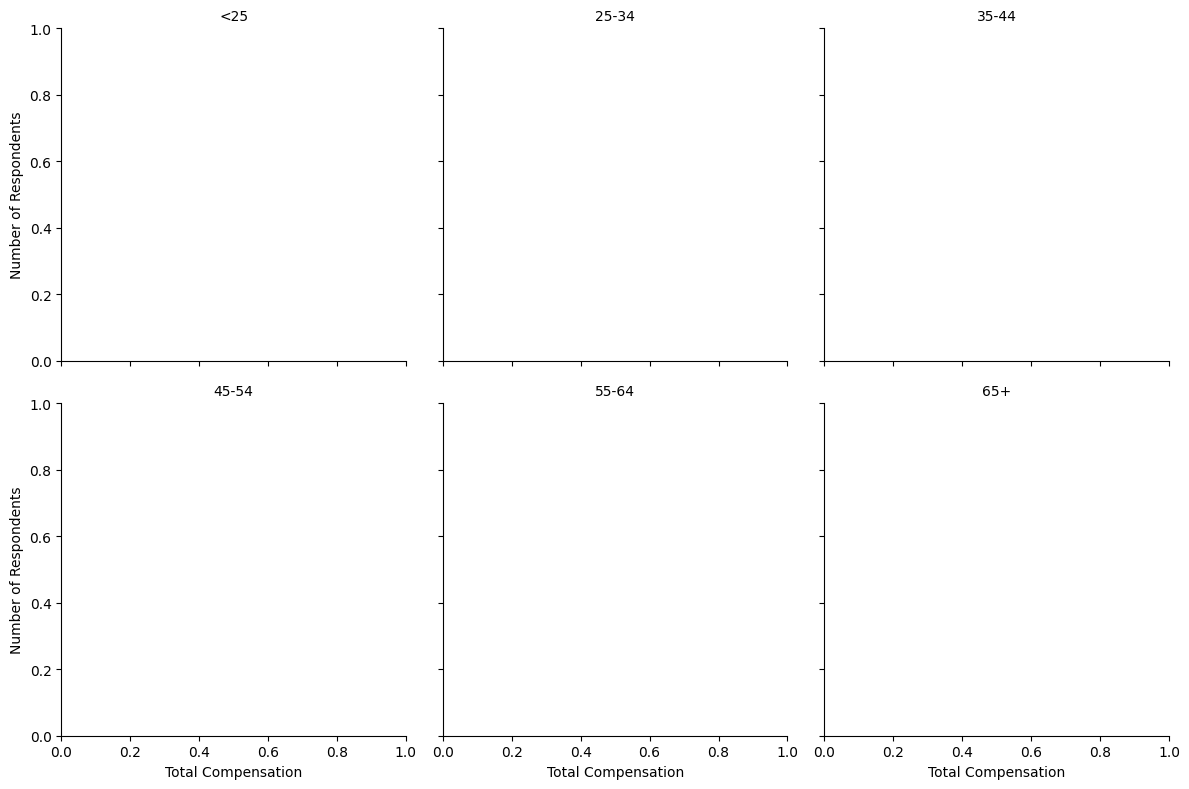

In [13]:
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# --- FIX: Convert both 'Age' and 'CompTotal' to numeric types ---
df_age_comp['Age'] = pd.to_numeric(df_age_comp['Age'], errors='coerce')
df_age_comp['CompTotal'] = pd.to_numeric(df_age_comp['CompTotal'], errors='coerce')
# ----------------------------------------------------------------


df_age_comp.dropna(subset=['Age', 'CompTotal'], inplace=True)

df_age_comp = df_age_comp[df_age_comp['CompTotal'] < 250000]
# ---------------------------------------

# Define age groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df_age_comp['AgeGroup'] = pd.cut(df_age_comp['Age'], bins=bins, labels=labels, right=False)

# Plot histograms for each age group
g = sns.FacetGrid(df_age_comp, col="AgeGroup", col_wrap=3, height=4)
g.map(plt.hist, "CompTotal", bins=20, color="indianred")
g.set_titles("{col_name}")
g.set_xlabels("Total Compensation")
g.set_ylabels("Number of Respondents")
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


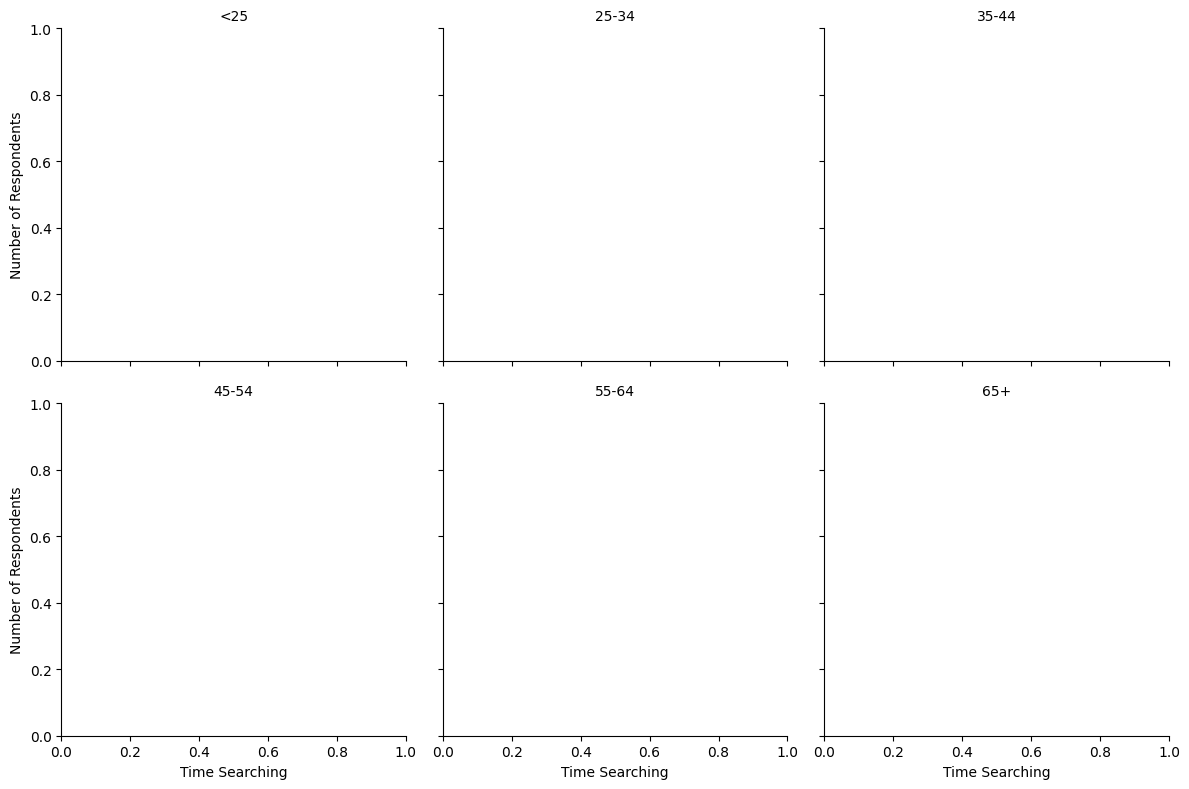

In [19]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching
FROM main
"""
df_age_time = pd.read_sql_query(QUERY, conn)

# Clean the 'Age' column by converting it to numeric and dropping missing values
df_age_time['Age'] = pd.to_numeric(df_age_time['Age'], errors='coerce')
df_age_time.dropna(subset=['Age'], inplace=True)

# Define age groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df_age_time['AgeGroup'] = pd.cut(df_age_time['Age'], bins=bins, labels=labels, right=False)

# Create a grid of histograms for each age group
g = sns.FacetGrid(df_age_time, col="AgeGroup", col_wrap=3, height=4)
g.map(plt.hist, "TimeSearching", bins=15, color="cornflowerblue")
g.set_titles("{col_name}")
g.set_xlabels("Time Searching")
g.set_ylabels("Number of Respondents")
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


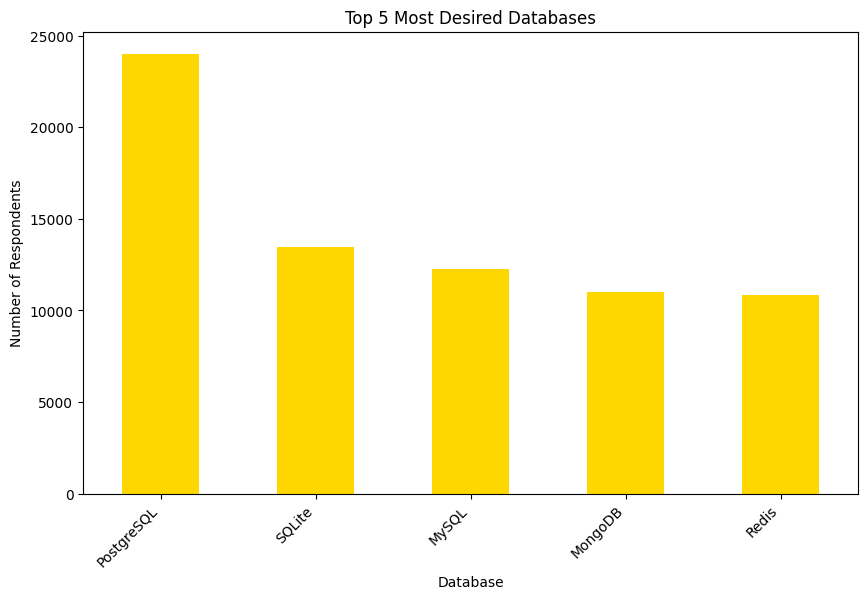

In [14]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df_db = pd.read_sql_query(QUERY, conn)

# Clean and process the data to count each database
df_db.dropna(subset=['DatabaseWantToWorkWith'], inplace=True)
db_counts = df_db['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts()

# Plot the top 5 as a bar chart
plt.figure(figsize=(10, 6))
db_counts.head(5).plot(kind='bar', color='gold')
plt.title('Top 5 Most Desired Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


TypeError: 'value' must be an instance of str or bytes, not a None

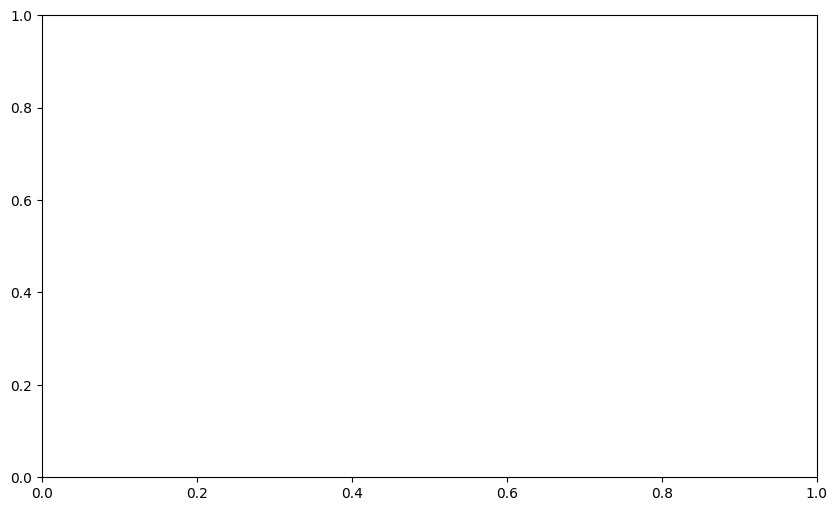

In [15]:
## Write your code here
QUERY = """
SELECT RemoteWork, COUNT(*) as Count
FROM main
GROUP BY RemoteWork
"""
df_remote = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.bar(df_remote['RemoteWork'], df_remote['Count'], color='mediumpurple')
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


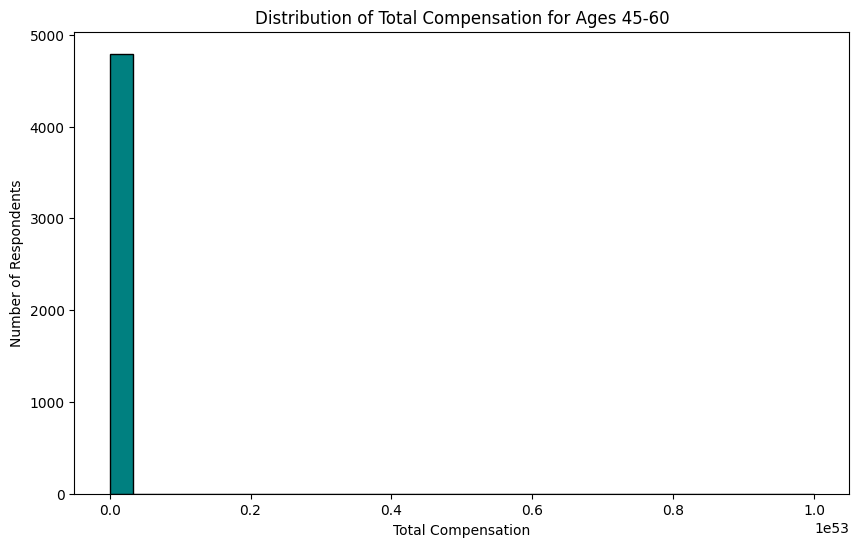

In [16]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main
WHERE Age BETWEEN 45 AND 60
"""
df_comp_45_60 = pd.read_sql_query(QUERY, conn)

# Clean the data
df_comp_45_60['CompTotal'] = pd.to_numeric(df_comp_45_60['CompTotal'], errors='coerce')
df_comp_45_60.dropna(subset=['CompTotal'], inplace=True)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp_45_60['CompTotal'], bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Total Compensation for Ages 45-60')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


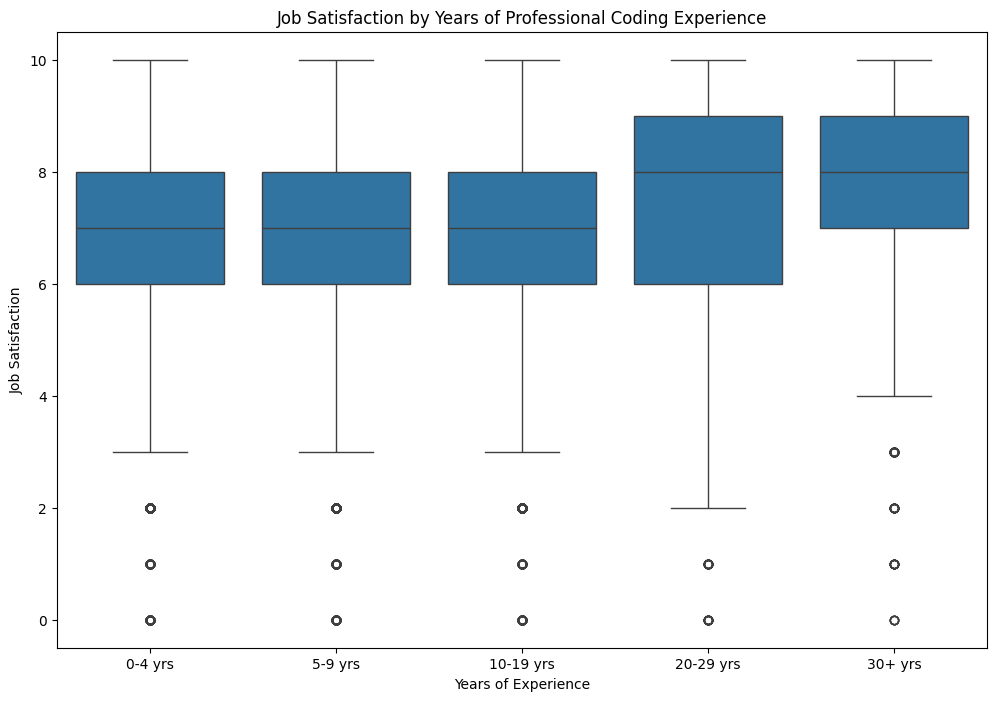

In [17]:
## Write your code here
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
"""
df_jobsat_exp = pd.read_sql_query(QUERY, conn)

# Clean and convert data to numeric types
df_jobsat_exp['YearsCodePro'] = pd.to_numeric(df_jobsat_exp['YearsCodePro'], errors='coerce')
df_jobsat_exp.dropna(subset=['YearsCodePro', 'JobSat'], inplace=True)

# Define experience groups
exp_bins = [0, 5, 10, 20, 30, 50]
exp_labels = ['0-4 yrs', '5-9 yrs', '10-19 yrs', '20-29 yrs', '30+ yrs']
df_jobsat_exp['ExperienceGroup'] = pd.cut(df_jobsat_exp['YearsCodePro'], bins=exp_bins, labels=exp_labels, right=False)

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_jobsat_exp, x='ExperienceGroup', y='JobSat', order=exp_labels)
plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction')
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [18]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
